In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# import umap
import warnings
warnings.filterwarnings('ignore')

In [124]:
# a) Cargue la base de datos, ¿hay alguna columna que no sea útil para el análisis?. Revise si existen casos faltantes en la base de datos, 
# según la descripción de las variables, ¿qué pudiera significar un NA? Tome decisiones de qué hacer si existen casos faltantes. 
# Si desea imputar los valores nulos de alguna variable por un valor puede utilizar data["columna"].fillna('valor', inplace = True).

# cargar dataset House_price.svc

house_price = pd.read_csv('House_price.csv', sep=';', decimal=',')
house_price.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


In [125]:
# analisis descritivo
house_price.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [126]:
# revisar datos faltantes
house_price.isnull().sum()

Id                 0
LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice          0
dtype: int64

In [127]:
# imputar los valores nulos
house_price['LotFrontage'].fillna(house_price['LotFrontage'].mean(), inplace=True)
house_price['MasVnrArea'].fillna(house_price['MasVnrArea'].mean(), inplace=True)

# imprimir data con valores nulos imputados
house_price.head()


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


In [128]:
house_price.isnull().sum()

Id               0
LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
SalePrice        0
dtype: int64

In [129]:
# eliminar columna de indice y 
house_price.set_index('Id', inplace=True)
house_price.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


In [130]:
# b) La variable a modelar corresponde al precio de venta de la casa en 
# dólares. En base a los modelos que hemos aprendido en clases, ¿qué 
# modelo(s) podría(n) ser de utilidad para predecir el precio de venta de 
# casas mediante las variables predictoras?

# Respuesta: se podrian utilizar modelo de Regresión lineal, regresión polinomial,
# regresión logística, árboles de decisión o random forest.

In [131]:
# c) Vamos a implementar un modelo de regresión lineal para modelar el 
# precio de venta de casas. Considerando que en la base de datos 
# tenemos varias variables que dependen de otras, ¿cuál pudiera ser el 
# problema que surgiría en este contexto? ¿por qué esto es un problema? 
# Discuta.

# Respuesta: el problema que surge es la multicolinealidad, ya que las variables
# independientes estan correlacionadas entre si.
# Para solucionar este problema se puede utilizar la técnica de reducción de dimensionalidad PCA.


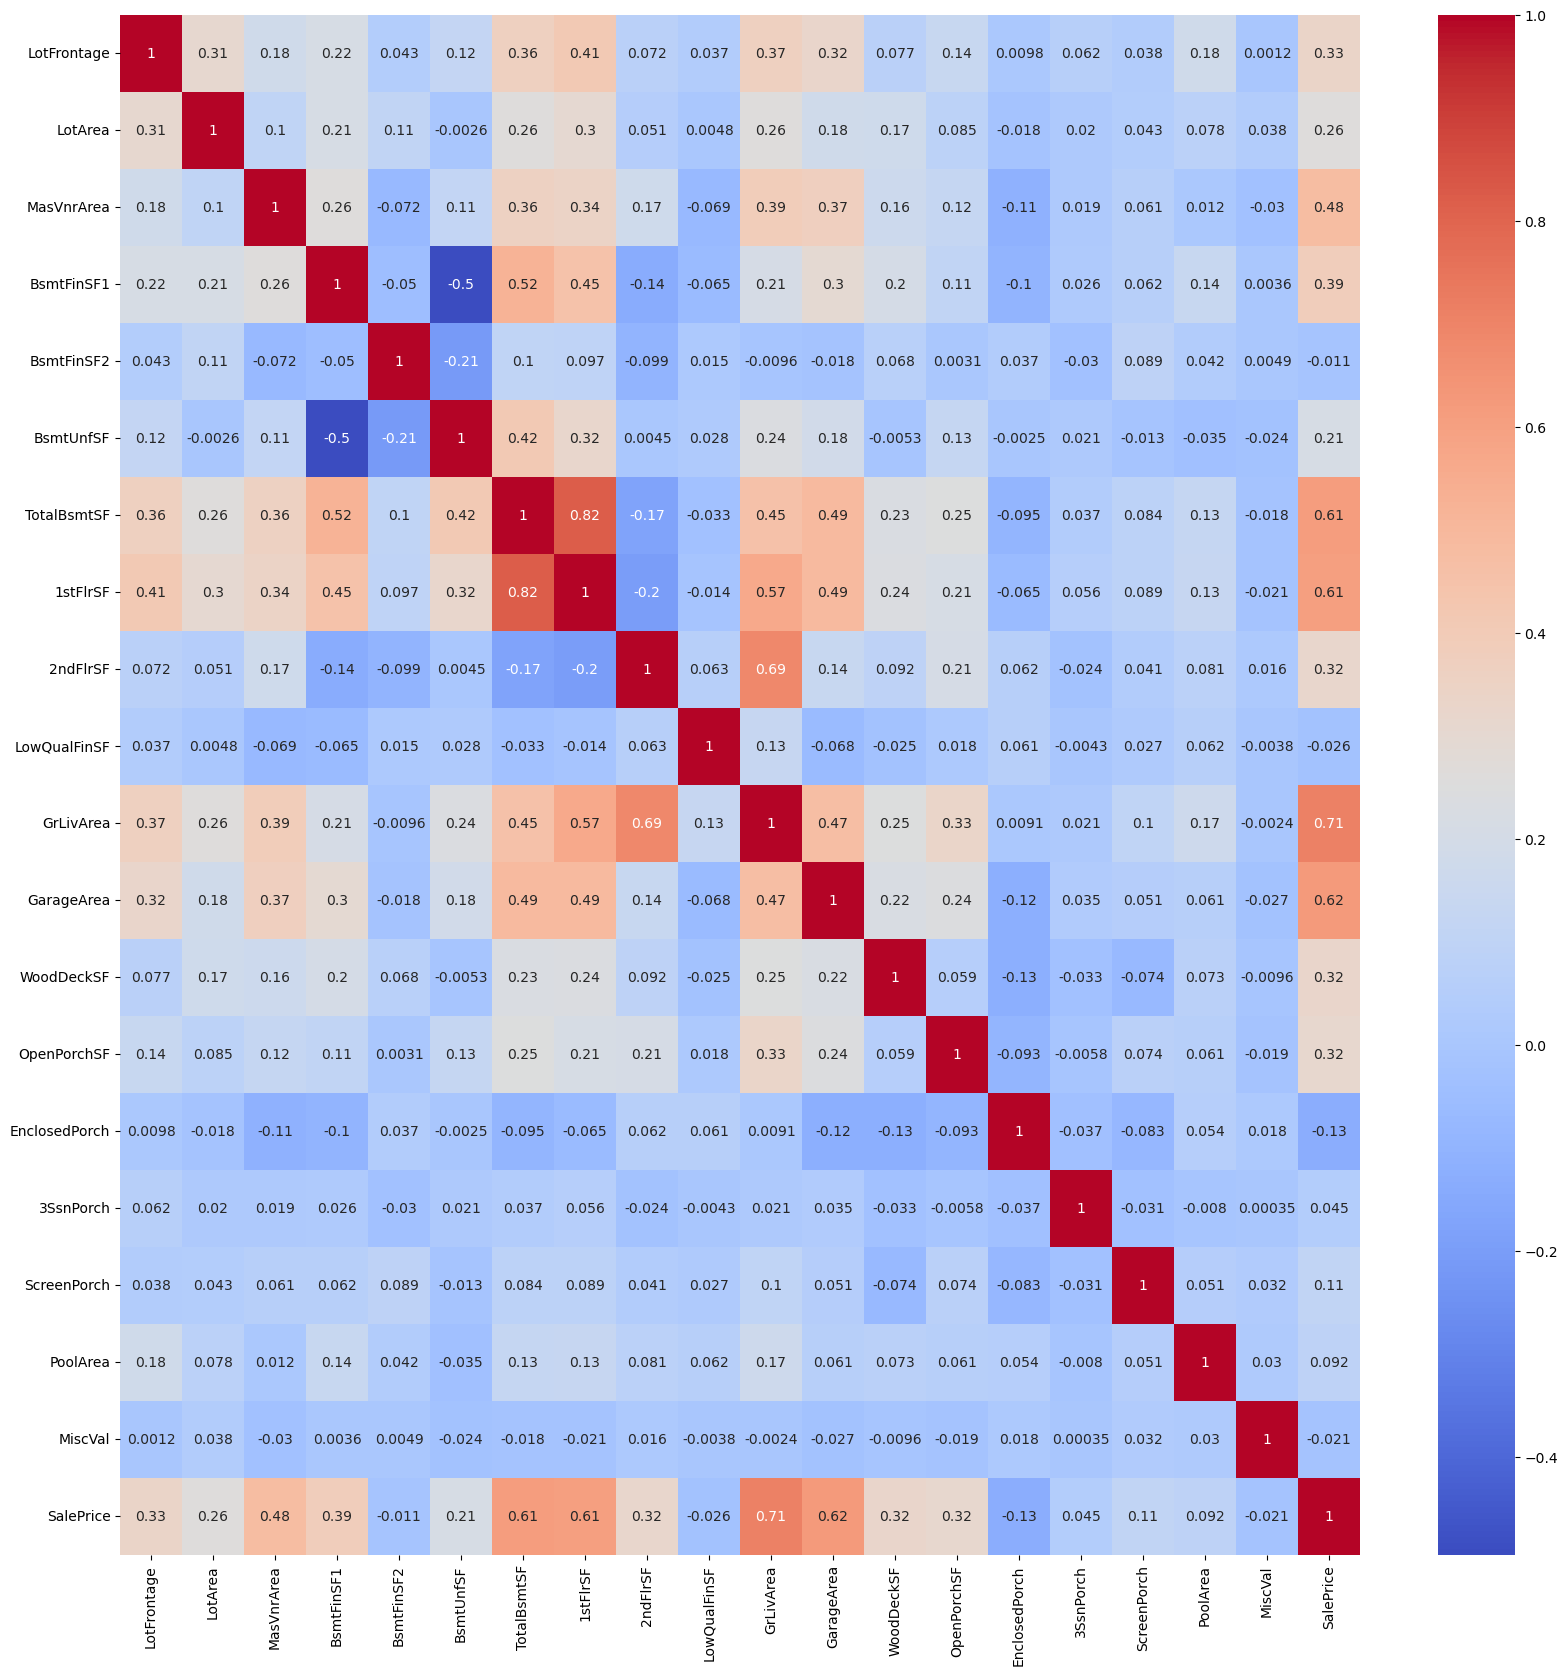

In [132]:
# d) Realice un análisis de la correlación entre las variables. Comente, 
# ¿existen variables muy correlacionadas entre sí? ¿Por qué cree que 
# ocurre?

# calcular correlacion
correlacion = house_price.corr()

# graficar correlacion
plt.figure(figsize=(20,20))
sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.show()


In [133]:
# las variables que estan muy correlacionadas con la variable SalePrice son: 
# GrLivArea, TotalBsmtSF, 1stFlrSF, GarageArea

# esto ocurre porque estas variables estan relacionadas con el tamaño de la casa, 
# y a mayor tamaño de la casa, mayor es el precio de venta.

In [134]:
# e) Suponga que este es un problema de gran volumen, donde tenemos 
# muchas columnas y registros. Cuando existen variables muy 
# correlacionadas el costo computacional para obtener el modelo puede 
# ser muy elevado. Obtenga el tiempo de procesamiento para obtener 
# una regresión lineal. Para esto, podemos obtener la regresión lineal 
# utilizando la función LinearRegression de sklearn.linear_model 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import time

# from datetime import datetime
# start=datetime.now()


# regresion lineal multiple
X = house_price.drop(["SalePrice"], axis=1)
y = house_price["SalePrice"]

# dividir data en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

modelo = LinearRegression() 

start_time = time.perf_counter() # tiempo inicial
modelo.fit(X_train, y_train) # entrenar modelo
finish_time = time.perf_counter() # tiempo final
print(finish_time - start_time) # tiempo de ejecución

y_pred = modelo.predict(X_test) # predecir

modelo.score(X_train,y_train) # score
accuracy = modelo.score(X_test, y_test) # accuracy
print(accuracy*100,'%') # imprimir accuracy


0.004632900003343821
66.25660335036721 %


In [135]:
# f) Obtenga las componentes principales utilizando las variables 
# estandarizadas, si desea explicar un 80% de la variabilidad, ¿cuántas 
# componentes debería elegir? Argumente.

# estandarizar data
scaler = StandardScaler()
scaler.fit(house_price)
house_price_estand = scaler.transform(house_price)

# aplicar PCA
pca = PCA(n_components=0.8)
pca.fit(house_price_estand)
house_price_pca = pca.transform(house_price_estand)

n_components = house_price_pca.shape[1]

print(' la cantidad de componentes es:', n_components)


 la cantidad de componentes es: 11


In [136]:
# g) Corra el modelo de regresión lineal con las componentes principales 
# como variables predictoras. Vuelva a calcular el tiempo de 
# procesamiento. ¿En cuál caso suele demorarse menos? ¿Qué ganamos 
# al realizar componentes principales? Concluya.

# regresion lineal multiple
X = house_price_pca
y = house_price["SalePrice"]

# dividir data en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

modelo_2 = LinearRegression()

start_time = time.perf_counter() # tiempo inicial
modelo_2.fit(X_train, y_train) # entrenar modelo
finish_time = time.perf_counter() # tiempo final
print(finish_time - start_time) # tiempo de ejecución

y_pred = modelo_2.predict(X_test) # predecir

modelo_2.score(X_train,y_train) # score
accuracy = modelo_2.score(X_test, y_test) # accuracy
print(accuracy*100,'%') # imprimir accuracy


0.0019996999762952328
77.75498817109317 %


In [137]:
# el modelo con componentes principales demora menos en ejecutarse 
# y tiene un mejor accuracy

# al realizar el modelo PCA se reduce la dimensionalidad de la data,
# por lo que se reduce el costo computacional y se mejora el accuracy del modelo.

